8个二维矢量，前四个属于一个类别，后四个属于另一个类别：
$$
{\omega}_1: x_1 = (4, -2)^T, x_2 = (3, -1)^T, x_3 = (3, -3)^T, x_4 = (3, -2)^T,
$$
$$
{\omega}_2: x_5 = (3, 0)^T, x_6 = (3, -4)^T, x_7 = (1, -2)^T, x_4 = (-1, 0)^T,
$$
（1）编程实现最近邻分类方法以判别$x=(0, 0)^T$的属性类别
（2）画出最近邻法分类界面。
（3）编程实现单模板匹配的方法以判别$x$的属性类别，并画出相应的分类界面。

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.colors import ListedColormap

w_1 = np.array([[4, -2], [3, -1], [3, -3], [3, -2]])
w_2 = np.array([[3, 0], [3, -4], [1, -2], [-1, 0]])
x = np.array([0, 0])

def nearest_neighbor(x, c1, c2):
    distance_1 = 0
    distance_2 = 0
    for i in range(c1.shape[0]):
        distance_1 += (c1[i] - x)[0]**2 + (c1[i] - x)[1]**2
    for i in range(c2.shape[0]):
        distance_2 += (c2[i] - x)[0]**2 + (c2[i] - x)[1]**2
    print("x属于w_1") if(distance_1 <= distance_2) else print("x属于w_2")
    return
    
nearest_neighbor(x, w_1, w_2)


x属于w_2


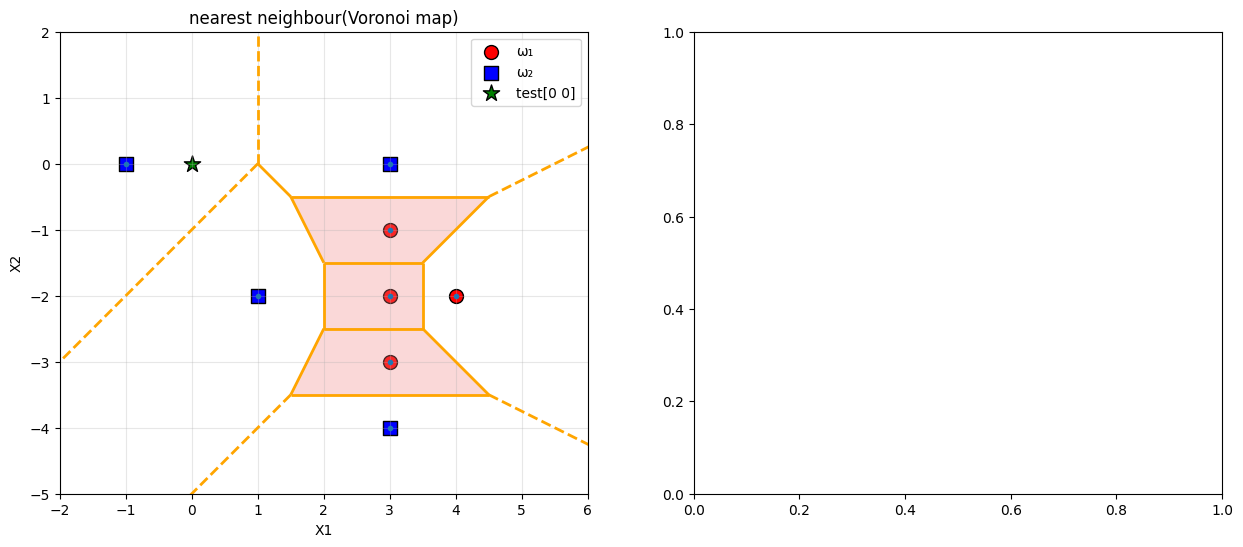

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

all_points = np.vstack([w_1, w_2])
labels = np.array([1]*len(w_1) + [2]*len(w_2)) 
vor = Voronoi(all_points)
voronoi_plot_2d(vor, ax=ax1, show_vertices=False, line_colors='orange', line_width=2)

# 绘制样本点
ax1.scatter(w_1[:, 0], w_1[:, 1], c='red', s=100, marker='o', label='ω₁', edgecolors='black')
ax1.scatter(w_2[:, 0], w_2[:, 1], c='blue', s=100, marker='s', label='ω₂', edgecolors='black')

# 绘制测试点
ax1.scatter(x[0], x[1], c='green', s=150, marker='*', label=f'test{x}', edgecolors='black')

# 为每个Voronoi区域着色
for region_index in range(len(vor.point_region)):
    region = vor.regions[vor.point_region[region_index]]
    if not -1 in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        # 确定该区域对应的类别
        point_label = labels[region_index]
        color = 'lightcoral' if point_label == 1 else 'lightblue'
        ax1.fill(*zip(*polygon), color=color, alpha=0.3)

ax1.set_xlim(-2, 6)
ax1.set_ylim(-5, 2)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('nearest neighbour(Voronoi map)')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_aspect('equal')

分别采用顺序聚类，谱系聚类和 K-均值聚类算法将下列 8 个样本聚成两个类别，并用 Dunn 指数和 Davies-Bouldin 指数评估聚类效果。

In [47]:
cluster = [[[5, 2]], [[1, 2]], [[2, 1]], [[6, 2]], [[1, 1]], [[3, 1]], [[7, -1]], [[5, -1]]]
points = np.array([[5, 2], [1, 2], [2, 1], [6, 2], [1, 1], [3, 1], [7, -1], [5, -1]])

# 顺序聚类
class_1 = [points[0]]
class_2 = []
theta = 3
for i in range(1, points.shape[0]):
    if np.sqrt((points[0][0] - points[i][0])**2 + (points[0][1] - points[i][1])**2) < theta:
        class_1.append(points[i])
    else:
        class_2.append(points[i])
print("类别一：",class_1)
print("\n")
print("类别二：",class_2)

类别一： [array([5, 2]), array([6, 2]), array([3, 1])]


类别二： [array([1, 2]), array([2, 1]), array([1, 1]), array([ 7, -1]), array([ 5, -1])]


In [49]:
# 谱系聚类
D = np.zeros((points.shape[0], points.shape[0]))
for i in range(points.shape[0]):
    for j in range(points.shape[0]):
        D[i][j] = np.sqrt((points[i][0] - points[j][0])**2 + (points[i][1] - points[j][1])**2)
np.fill_diagonal(D, np.inf)

while(len(cluster) > 2):
    indices = np.where(D == np.min(D))
    i, j = indices[0][0], indices[1][0]
    cluster[i].append(cluster[j])
    cluster.pop(j)
    # 更新距离矩阵：删除第j行第j列
    D = np.delete(D, j, axis=0)
    D = np.delete(D, j, axis=1)
    # 更新第i行和第i列的距离（使用最大距离，全连接）
    for k in range(len(D)):
        if k != i:
            # 计算新簇与其他簇的距离
            dist = max(D[i, k], D[k, i])  # 全连接：取最大距离
            D[i, k] = dist
            D[k, i] = dist
        
    # 对角线重新设为无穷大
    np.fill_diagonal(D, np.inf)
    
print(cluster)

[[[5, 2], [[6, 2]], [[7, -1], [[5, -1]]]], [[1, 2], [[1, 1]], [[2, 1], [[3, 1]]]]]


In [ ]:
# K-均值聚类算法
